In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv


> Data Preprocessing

In [2]:
train_df = pd.read_csv("../input/santander-customer-satisfaction/train.csv",encoding='latin-1')
print('dataset shape:', train_df.shape)
train_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
test_df = pd.read_csv("../input/santander-customer-satisfaction/test.csv",encoding='latin-1')
print('dataset shape:', test_df.shape)
test_df.head(3)

dataset shape: (75818, 370)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
print(train_df['TARGET'].value_counts())

unsatisfied_cnt = train_df[train_df['TARGET'] == 1]['TARGET'].count()
total_cnt = train_df['TARGET'].count()

print('unsatisfied Ratio {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied Ratio 0.04


In [6]:
train_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
print(train_df['var3'].value_counts( )[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [8]:
print(test_df['var3'].value_counts( )[:10])

 2         73962
-999999      120
 8           116
 9           108
 13          107
 3           107
 1            99
 10           85
 11           85
 12           83
Name: var3, dtype: int64


> -999999 is a NaN -> Should replace or Drop it 

In [9]:
# var3 value replace -999999 to 2, Drop ID feature
train_df['var3'].replace(-999999, 2, inplace=True)
train_df.drop('ID',axis=1 , inplace=True)

test_df['var3'].replace(-999999, 2, inplace=True)
test_df.drop('ID',axis=1 , inplace=True)

# Split feature, lable. 
X_features = train_df.iloc[:, :-1]
y_labels = train_df.iloc[:, -1]
print('Feature data shape:{0}'.format(X_features.shape))

X_test = test_df

Feature data shape:(76020, 369)


In [10]:
from sklearn.model_selection import train_test_split
# Split train, validation set 
X_train, X_val, y_train, y_val = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
val_cnt = y_val.count()
print('train set Shape:{0}, val set Shape:{1}'.format(X_train.shape , X_val.shape))

print(' ratio of train set label')
print(y_train.value_counts()/train_cnt)
print('\n ratio of validation set label')
print(y_val.value_counts()/val_cnt)

train set Shape:(60816, 369), val set Shape:(15204, 369)
 ratio of train set label
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 ratio of validation set label
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators: 500 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# evaluation: auc, early_stopping_roubnds: 100. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [12]:
# n_estimators: 1000, learning_rate=0.02, reg_alpha=0.03. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric: auc, early stopping: 200  
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82311	validation_1-auc:0.81523
[1]	validation_0-auc:0.82709	validation_1-auc:0.81657
[2]	validation_0-auc:0.83203	validation_1-auc:0.82039
[3]	validation_0-auc:0.83587	validation_1-auc:0.82502
[4]	validation_0-auc:0.83820	validation_1-auc:0.82608
[5]	validation_0-auc:0.83795	validation_1-auc:0.82728
[6]	validation_0-auc:0.83810	validation_1-auc:0.82689
[7]	validation_0-auc:0.83847	validation_1-auc:0.82713
[8]	validation_0-auc:0.83978	validation_1-auc:0.82820
[9]	validation_0-auc:0.83981	validation_1-auc:0.82783
[10]	validation_0-auc:0.84166	validation_1-auc:0.82900
[11]	validation_0-auc:0.84107	validation_1-auc:0.82802
[12]	validation_0-auc:0.84117	validation_1-auc:0.82852
[13]	validation_0-auc:0.84145	validation_1-auc:0.82832
[14]	validation_0-auc:0.84531	validation_1-auc:0.83410
[15]	validation_0-auc:0.84453	validation_1-auc:0.83239
[16]	validation_0-auc:0.84510	validation_1-auc:0.83325
[17]	validation_0-auc:0.84716	validation_1-auc:0.83571
[18]	validation_0-au

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

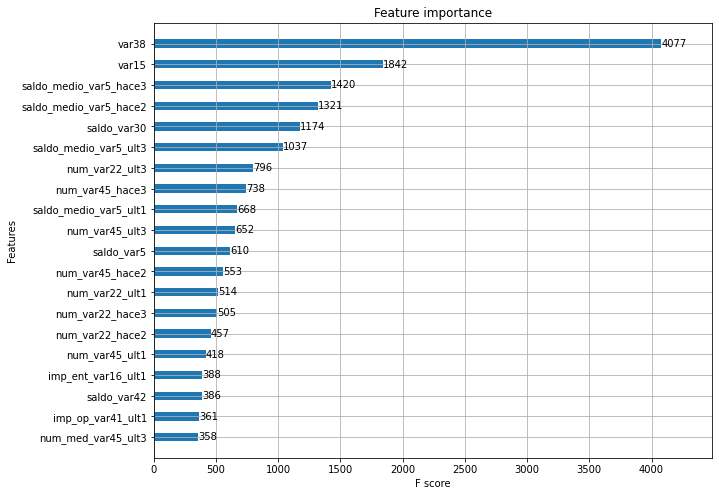

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

In [14]:
submission = pd.read_csv('../input/santander-customer-satisfaction/sample_submission.csv')
submission.head()
#finals_pred = xgb_clf.predict(X_test)

#finals_pred

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [15]:
target = xgb_clf.predict(X_test)

submission['TARGET'] = target

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [16]:
submission.to_csv('submission.csv', index=False)